# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [37]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [38]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [39]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

Коэффициенты Lasso:
[  0.           0.         274.33128438  48.57203696   0.
   0.          -0.           0.         424.12142666   0.        ]
Количество нулевых коэффициентов (|coef| < 1e-5): 7

Коэффициенты Ridge:
[  20.86588099  -58.00039065  231.2704688   186.67010355   33.31087207
   -2.16994737 -150.95049376  141.35036492  250.75391278  123.18025806]
Количество нулевых коэффициентов (|coef| < 1e-2): 0



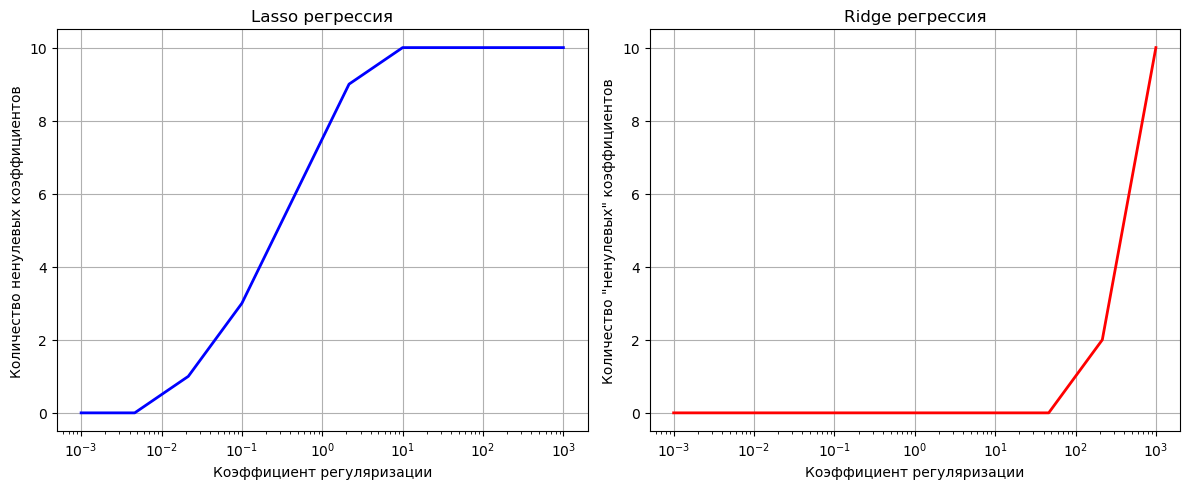

In [40]:
lasso_default = Lasso()
lasso_default.fit(X_train, y_train)

ridge_default = Ridge()
ridge_default.fit(X_train, y_train)

lasso_coef = lasso_default.coef_
ridge_coef = ridge_default.coef_

print("Коэффициенты Lasso:")
print(lasso_coef)
print(f"Количество нулевых коэффициентов (|coef| < 1e-5): {np.sum(np.abs(lasso_coef) < 1e-1)}")
print()

print("Коэффициенты Ridge:")
print(ridge_coef)
print(f"Количество нулевых коэффициентов (|coef| < 1e-2): {np.sum(np.abs(ridge_coef) < 1)}")
print()

alphas = np.logspace(-3, 3, 10)

lasso_none_zero = []
ridge_none_zero = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_none_zero.append(np.sum(np.abs(lasso.coef_) < 1e-1))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_none_zero.append(np.sum(np.abs(ridge.coef_) < 1))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_none_zero, 'b-', linewidth=2)
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Lasso регрессия')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_none_zero, 'r-', linewidth=2)
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('Количество "ненулевых" коэффициентов')
plt.title('Ridge регрессия')
plt.grid(True)

plt.tight_layout()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return rmse, mae, r2

ridge_rmse, ridge_mae, ridge_r2 = calculate_metrics(ridge_default, X_test, y_test)

print("Метрики качества Ridge регрессии на тестовой выборкe:")
print(f"RMSE: {ridge_rmse:.4f}")
print(f"MAE: {ridge_mae:.4f}")
print(f"R²: {ridge_r2:.4f}")

ridge_rmse_train, ridge_mae_train, ridge_r2_train = calculate_metrics(ridge_default, X_train, y_train)

print("\nМетрики Ridge регрессии на обучающей выборке:")
print(f"RMSE: {ridge_rmse_train:.4f}")
print(f"MAE: {ridge_mae_train:.4f}")
print(f"R²: {ridge_r2_train:.4f}")

Метрики качества Ridge регрессии на тестовой выборкe:
RMSE: 58.3043
MAE: 49.6028
R²: 0.3599

Метрики Ridge регрессии на обучающей выборке:
RMSE: 58.3271
MAE: 48.4155
R²: 0.4510


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

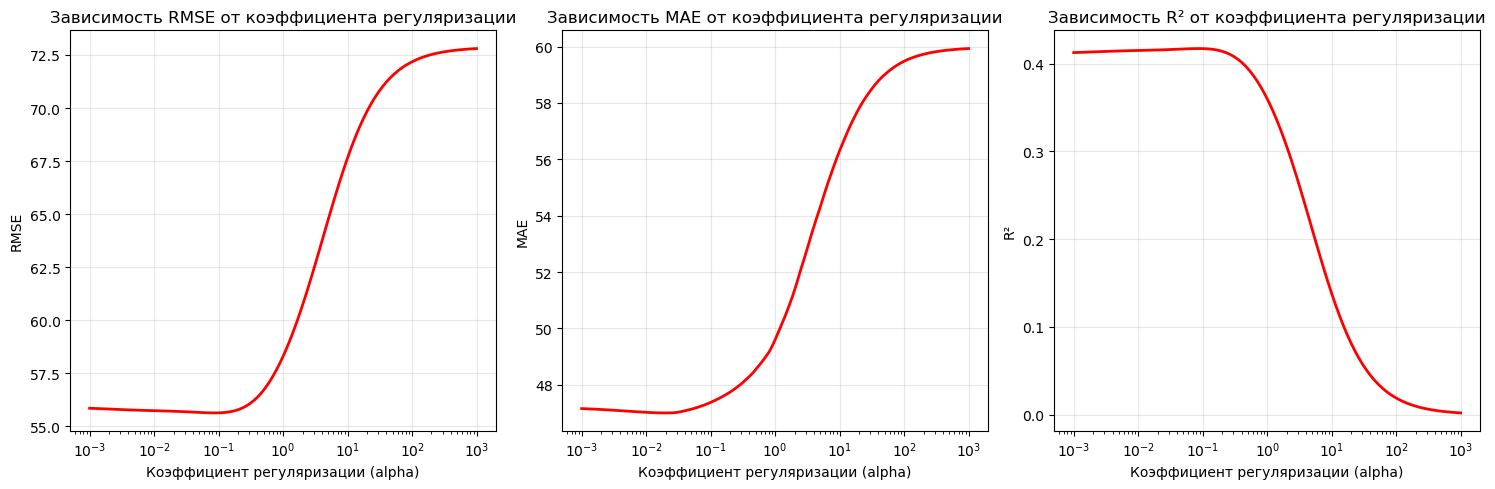

=== Оптимальные значения alpha по разным метрикам ===
Лучшее alpha по RMSE: 0.0870 (RMSE = 55.6391)
Лучшее alpha по MAE: 0.0215 (MAE = 47.0029)
Лучшее alpha по R²: 0.0870 (R² = 0.4171)

=== Метрики модели с alpha=1.0 (по умолчанию) ===
RMSE: 58.3043
MAE: 49.6028
R²: 0.3599

Улучшение RMSE при оптимальном alpha: 2.6652
Улучшение MAE при оптимальном alpha: 2.5999
Улучшение R² при оптимальном alpha: 0.0572

=== Метрики лучшей модели (по RMSE) на тестовой выборке ===
RMSE: 55.6391
MAE: 47.3174
R²: 0.4171


In [43]:
alphas = np.logspace(-3, 3, 100)

test_rmse_list = []
test_mae_list = []
test_r2_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    y_pred = ridge.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    test_rmse_list.append(rmse)
    test_mae_list.append(mae)
    test_r2_list.append(r2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.semilogx(alphas, test_rmse_list, 'r-', linewidth=2)
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от коэффициента регуляризации')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.semilogx(alphas, test_mae_list, 'r-', linewidth=2)
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('MAE')
plt.title('Зависимость MAE от коэффициента регуляризации')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.semilogx(alphas, test_r2_list, 'r-', linewidth=2)
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('R²')
plt.title('Зависимость R² от коэффициента регуляризации')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

best_alpha_rmse = alphas[np.argmin(test_rmse_list)]
best_alpha_mae = alphas[np.argmin(test_mae_list)]
best_alpha_r2 = alphas[np.argmax(test_r2_list)]

print("=== Оптимальные значения alpha по разным метрикам ===")
print(f"Лучшее alpha по RMSE: {best_alpha_rmse:.4f} (RMSE = {np.min(test_rmse_list):.4f})")
print(f"Лучшее alpha по MAE: {best_alpha_mae:.4f} (MAE = {np.min(test_mae_list):.4f})")
print(f"Лучшее alpha по R²: {best_alpha_r2:.4f} (R² = {np.max(test_r2_list):.4f})")

ridge_default = Ridge(alpha=1.0)
ridge_default.fit(X_train, y_train)
y_test_pred_default = ridge_default.predict(X_test)

test_rmse_default = np.sqrt(mean_squared_error(y_test, y_test_pred_default))
test_mae_default = mean_absolute_error(y_test, y_test_pred_default)
test_r2_default = r2_score(y_test, y_test_pred_default)

print("\n=== Метрики модели с alpha=1.0 (по умолчанию) ===")
print(f"RMSE: {test_rmse_default:.4f}")
print(f"MAE: {test_mae_default:.4f}")
print(f"R²: {test_r2_default:.4f}")

print(f"\nУлучшение RMSE при оптимальном alpha: {test_rmse_default - np.min(test_rmse_list):.4f}")
print(f"Улучшение MAE при оптимальном alpha: {test_mae_default - np.min(test_mae_list):.4f}")
print(f"Улучшение R² при оптимальном alpha: {np.max(test_r2_list) - test_r2_default:.4f}")

best_ridge = Ridge(alpha=best_alpha_rmse)
best_ridge.fit(X_train, y_train)

y_test_pred_best = best_ridge.predict(X_test)
best_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
best_test_mse = mean_squared_error(y_test, y_test_pred_best)
best_test_mae = mean_absolute_error(y_test, y_test_pred_best)
best_test_r2 = r2_score(y_test, y_test_pred_best)

print("\n=== Метрики лучшей модели (по RMSE) на тестовой выборке ===")
print(f"RMSE: {best_test_rmse:.4f}")
print(f"MAE: {best_test_mae:.4f}")
print(f"R²: {best_test_r2:.4f}")

Качество изменилось заметно, но не сильно

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

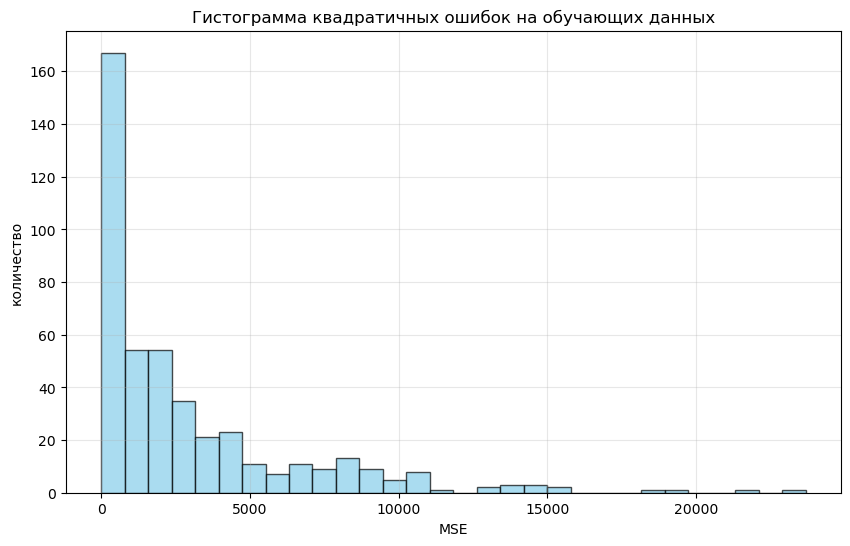

In [44]:
best_ridge = Ridge(alpha=best_alpha_rmse)
x = np.concatenate((X_train,X_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)
best_ridge.fit(x, y)

y_train_pred = best_ridge.predict(x)

squared_errors = (y_train_pred - y) ** 2

plt.figure(figsize=(10, 6))
plt.hist(squared_errors, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('MSE')
plt.ylabel('количество')
plt.title('Гистограмма квадратичных ошибок на обучающих данных')
plt.grid(True, alpha=0.3)
plt.show()

Мы видим объекты с сильно более большим отклонением, чем все остальные, кажется, что стоит поставить границу выбросов 15000.

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [45]:
high_mse_indices = np.where(squared_errors > 15000)[0]

X_train_filtered = np.delete(x, high_mse_indices, axis=0)
y_train_filtered = np.delete(y, high_mse_indices, axis=0)

best__filtered_ridge = Ridge(alpha=best_alpha_rmse)
best__filtered_ridge.fit(X_train_filtered, y_train_filtered)

y_test_pred_filtered = best__filtered_ridge.predict(X_test)

test_rmse_filtered = mean_squared_error(y_test, y_test_pred_filtered)
test_mae_filtered = mean_absolute_error(y_test, y_test_pred_filtered)
test_r2_filtered = r2_score(y_test, y_test_pred_filtered)


print(f"MSE до удаления выбросов: {best_test_mse:.4f}")
print(f"MAE до удаления выбросов: {best_test_mae:.4f}")
print()
print(f"MSE: {test_rmse_filtered:.4f}")
print(f"MAE: {test_mae_filtered:.4f}")

MSE до удаления выбросов: 3095.7128
MAE до удаления выбросов: 47.3174

MSE: 2768.7324
MAE: 44.8454


Результат улучшился!!!

__Задание 3.__ Отчёт

**(2 балла)**

Я обучил линейную регрессию и познакомился с метриками качества в задачах регрессии. В первом задании я подобрал оптимальный коэффициент регуляризации. При этом оценки по всем рассмотренным метрикам улучшились на небольшое значение. Во втором я попытался удалить выбросы, это улучшило результат.